In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [2]:
path = './instances/RC105.txt'

In [3]:
solution = """0 0.0 1 71 3 84.0 5 96.0 45 109.0 4 151 70 179.60107523773829 68 199.8967053787253 0 219.8967053787253
0 0.0 65 11.180339887498949 57 82 86 101.05538513813741 77 163 99 205.1403173599764 0 235.65860188865958
0 0.0 88 67 79 99 7 120.40175425099137 8 135.40175425099136 46 148.40175425099136 6 163.40175425099136 2 177.40175425099136 100 200 0 229.23538406167134
0 0.0 69 51 98 66.0 53 101 12 124.0 10 139.38516480713452 11 151.38516480713452 13 167.21611670197981 9 182.21611670197981 90 221.76269010736814 0 236.00533079448743
0 0.0 73 65 14 90.29705854077835 47 103.29705854077835 15 118.29705854077835 16 130.29705854077835 17 147 78 170.60147050873545 60 188.663728257034 55 213.663728257034 0 237.80586388076495
0 0.0 27 60 26 75.0 28 88.0 33 106.60232526704263 89 143.50957336119006 84 179.50957336119006 56 198.72911781848296 0 226.7568741958029
0 0.0 81 80 54 127 41 152.29705854077835 44 169.91283164664225 42 181.91283164664225 0 225.45385130913908
0 0.0 72 27.459060435491963 39 52.756118976270315 38 85 37 98.605551275464 35 138 36 150.0 40 165.0 43 180.0 61 212.3606797749979 0 238.17206807583977
0 0.0 83 19.235384061671343 19 58 22 94 20 111 49 124.0 48 141.0 21 153.0 23 165.0 25 178.0 0 233.27692569068708
0 0.0 92 15 34 62 31 75.0 29 87.0 30 102.3851648071345 32 116 50 141.81138830084188 62 158.81138830084188 67 175.88245611270736 80 203.6025012593767 0 221.21827436524063
0 0.0 91 97 95 115.60232526704263 94 136.6476862842299 93 173 71 188.0 96 208.0498756211209 0 233.5740503173809
0 0.0 64 53 51 77.14213562373095 85 95.68613936904848 63 109.29169064451247 76 128.72567177656907 18 156.18992097314205 24 177.85182476283265 66 210.05542807400718 0 233.09383288441248
0 0.0 82 14.7648230602334 52 37.917769498199306 59 65.94552587551925 87 100 97 120.0 75 143.0384048104053 58 172 74 193.18033988749895 0 239.23585264213884""".split('\n')

In [4]:
def to_point(line):
    mapping = ['number', 'x', 'y', 'demand', 'ready_time', 'due_date', 'service_time']
    line = line.replace('\n', '').split()
    return {k:int(v) for k,v in zip(mapping, line)}

In [5]:
with open(path, 'r') as f:
    data = f.readlines()
points = list(map(to_point, data[9:]))

In [6]:
G = nx.Graph()
G.add_nodes_from(range(len(points)))
for route in solution:
    G.add_path(list(map(int, route.split()[::2])))

In [7]:
paths = []
for route in solution:
    path = []
    route = list(map(int, route.split()[::2]))
    for i in range(len(route) - 1):
        path.append((route[i], route[i+1]))
    paths.append(path)

c:\users\gzhigalov\documents\programs\miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


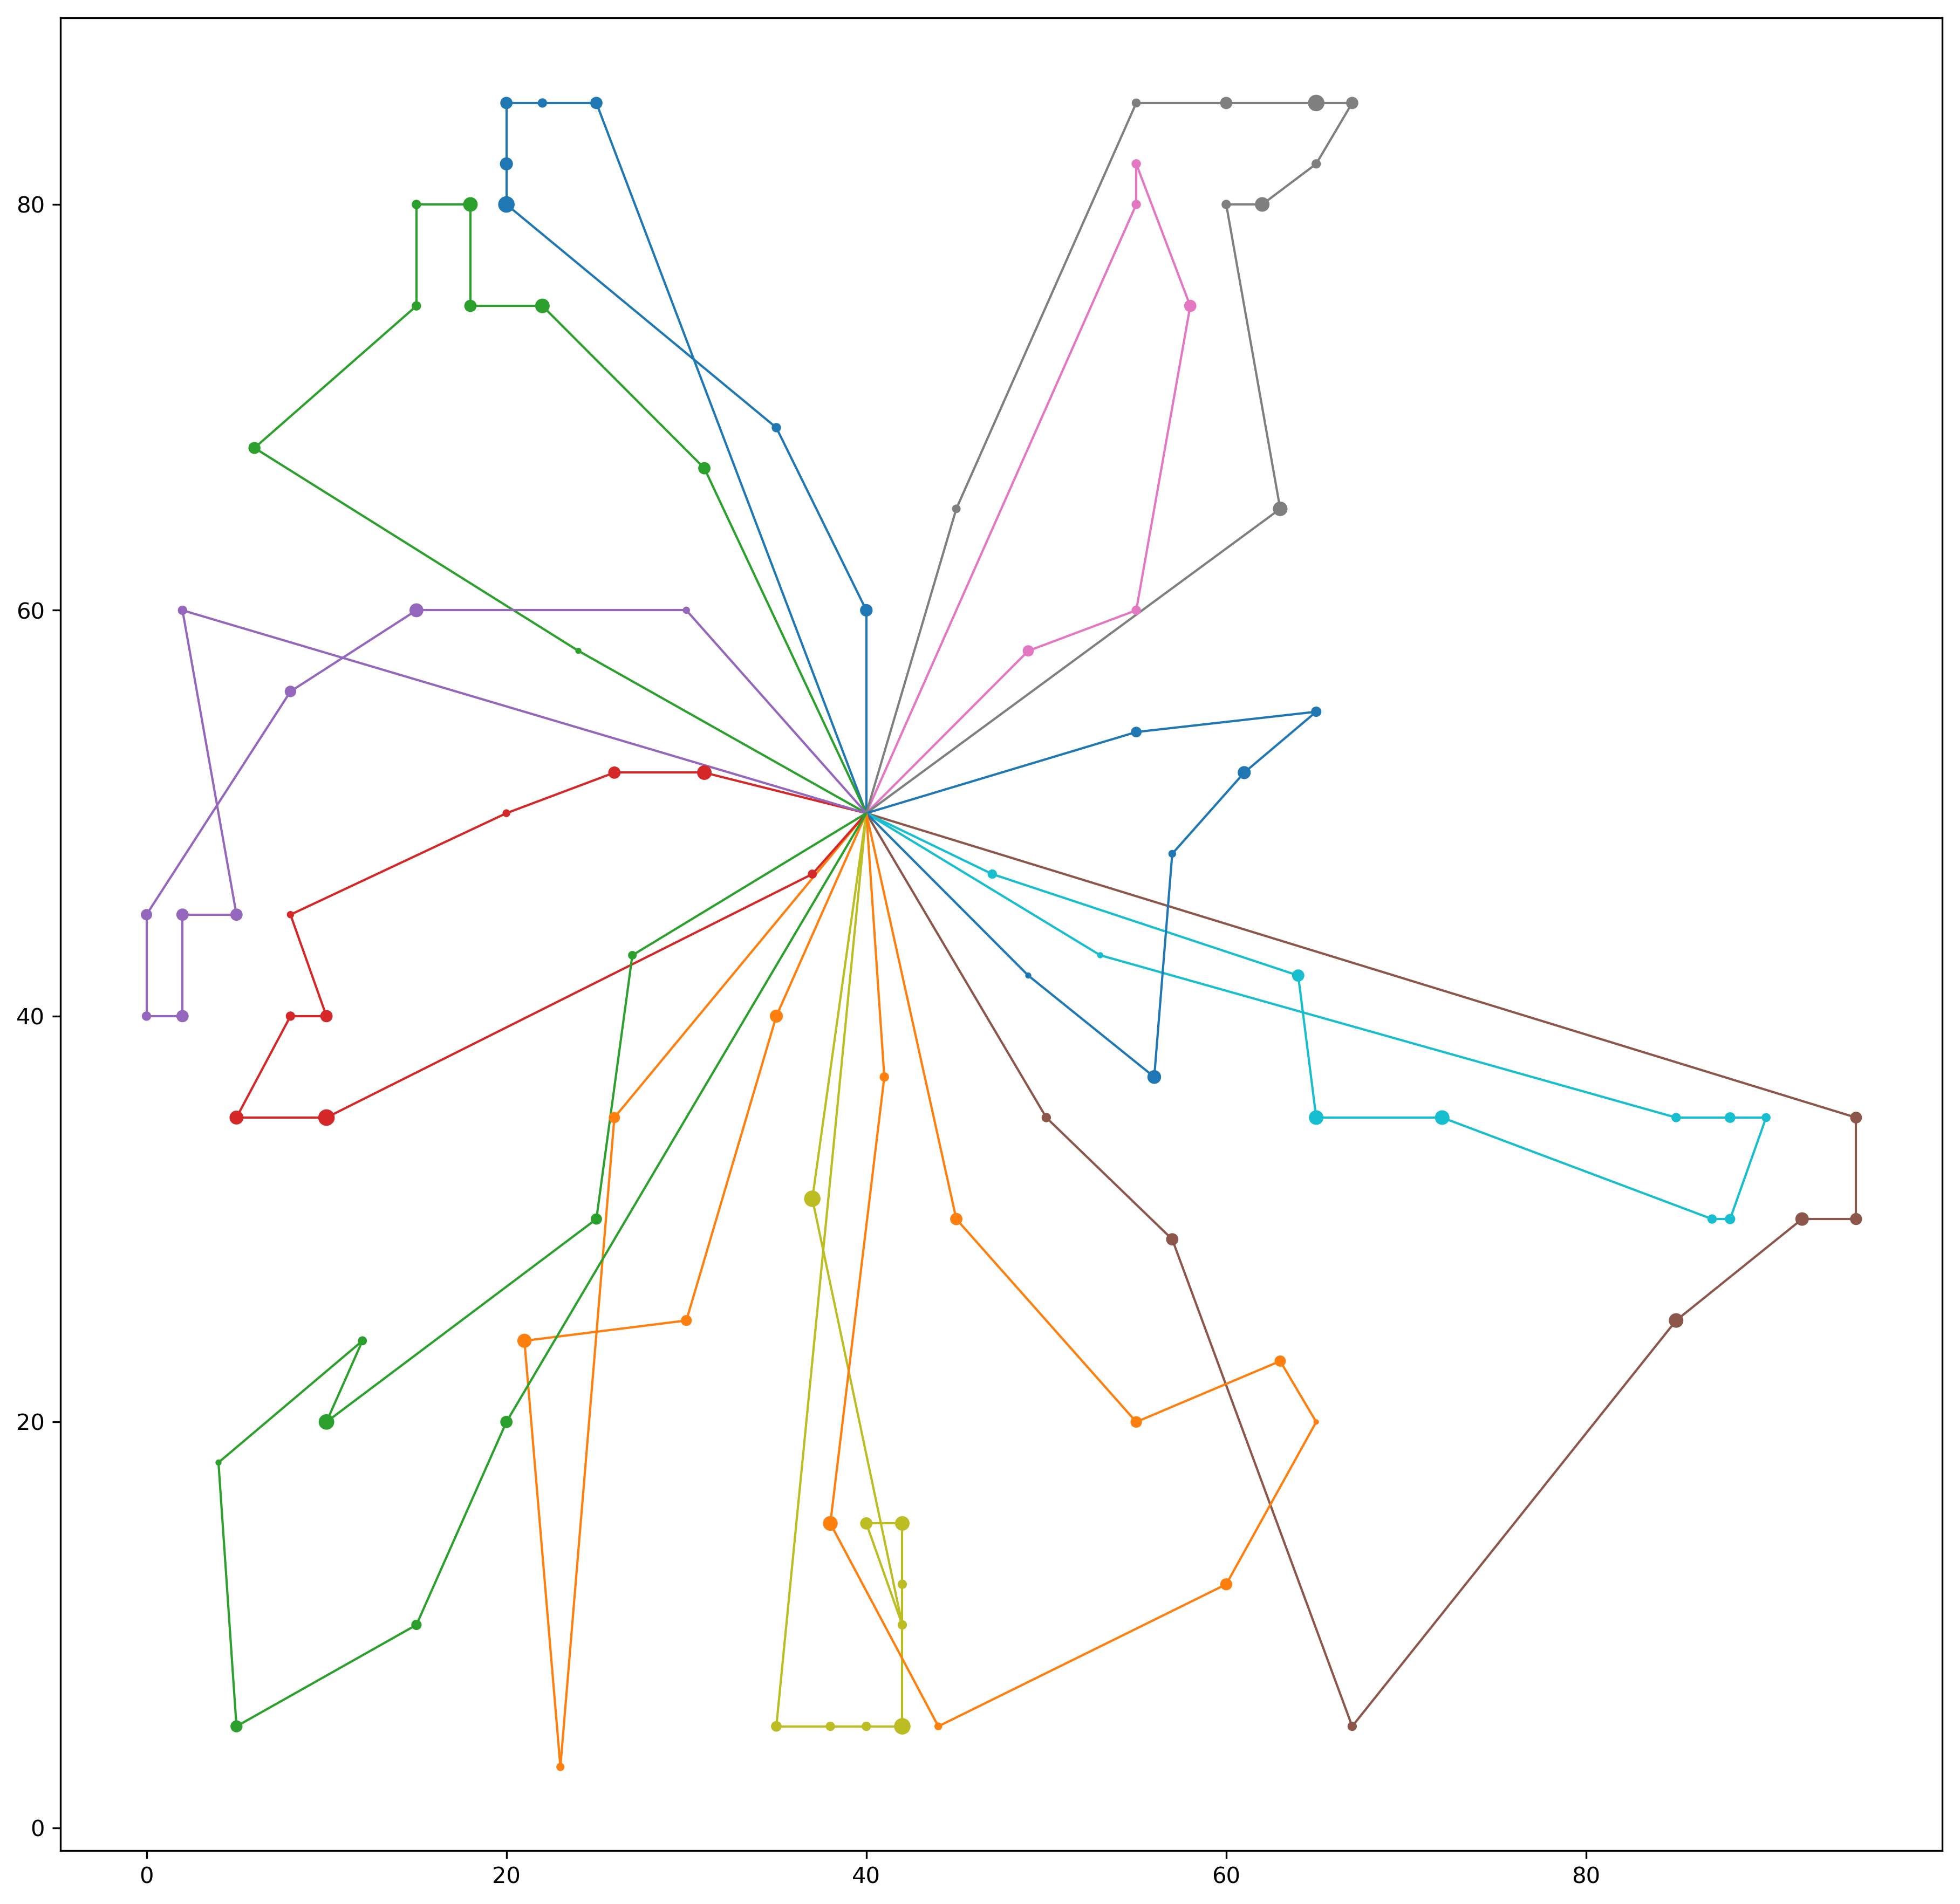

In [8]:
from itertools import cycle
col = cycle(colors.TABLEAU_COLORS)
# pos = nx.spring_layout(G)
pos = {point['number']: (point['x'], point['y']) for point in points}

fig, ax = plt.subplots(figsize=(15,15), dpi=300)
# ax.grid()

# nx.draw_networkx_labels(G, pos=pos, labels=labels, ax=ax)
for path in paths:
    # print(path)
    path_color = next(col)
    nodes_in_path = {x for p in path for x in p}
    node_sizes = [point['demand'] for point in points if point['number'] in nodes_in_path]
    
    labels = {filter(lambda x: x['number'] in nodes_in_path, points)}
    nx.draw_networkx_edges(G, pos=pos, edgelist=path, ax=ax, edge_color=path_color)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_in_path, node_size=node_sizes, node_color=path_color, ax=ax)
plt.savefig("5.png", dpi=300)